In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import aplpy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
from scipy.optimize import curve_fit
from astropy.stats import bootstrap
import matplotlib.ticker as ticker
from aplpy import FITSFigure  
import astropy.units as u 

plt.rcParams.update({'font.size': 18})
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16



In [3]:
dense_cores = pd.read_csv('../data/dense_cores - Copy.tsv',delimiter='\t',header=None)
dense_cores.head()

RA_array = np.array(dense_cores[7])
DEC_array = np.array(dense_cores[8])



In [4]:
FITS1 = '../FITS_file/new_fits/DR21_OTF_full_pipeline.fits'
FITS2 = '../FITS_file/new_fits/DR21_full_NH2_Repr.fits'

hdul = fits.open(FITS1)
hdul2 = fits.open(FITS2)


MapStokesI = hdul[0]
MapStokesIError = hdul[1]
MapStokesQ = hdul[2]
MapStokesU = hdul[4]
MapDebPol = hdul[8]
MapDebPolError = hdul[9]
MapPolAngleNonRotated = hdul[10]
MapPolAngle = hdul[11]
MapPolAngleError = hdul[12]
MapPolFlux = hdul[13]
MapPolFluxError = hdul[14]
MapColumndensity = hdul2[0]


MapPolSNR = MapDebPol.copy()
BlankedMapPol = MapDebPol.copy()
BlankedMapPolAngle = MapPolAngle.copy()
BlankedMapPolAngleError = MapPolAngleError.copy()
BlankedMapPolAngleNonRotated = MapPolAngleNonRotated.copy() 
BlankedMapStokesI = MapStokesI.copy()
BlankedMapStokesQ = MapStokesQ.copy()
BlankedMapStokesU = MapStokesU.copy()
BlankedMapColumnDensity = MapColumndensity.copy()

######## taking points only with singal to noise ratio more than 3
MapPolSNR.data[:] = np.nan
MapPolSNR.data = MapDebPol.data/MapDebPolError.data

Selector = (MapPolSNR.data < 3)
BlankedMapPol.data[Selector] = np.nan
BlankedMapPolAngle.data[Selector] = np.nan
BlankedMapPolAngleError.data[Selector] = np.nan
BlankedMapStokesI.data[Selector] = np.nan
BlankedMapStokesQ.data[Selector] = np.nan
BlankedMapStokesU.data[Selector] = np.nan
BlankedMapPolAngleNonRotated.data[Selector] = np.nan
BlankedMapColumnDensity.data[Selector] = np.nan

############## removing any points with pfrac above 50
Selector = (BlankedMapPol.data>50)
BlankedMapPol.data[Selector] = np.nan
BlankedMapPolAngle.data[Selector] = np.nan
BlankedMapPolAngleError.data[Selector] = np.nan
BlankedMapStokesI.data[Selector] = np.nan
BlankedMapStokesQ.data[Selector] = np.nan
BlankedMapStokesU.data[Selector] = np.nan
BlankedMapPolAngleNonRotated.data[Selector] = np.nan
BlankedMapColumnDensity.data[Selector] = np.nan

############ removing any data points with I/I_error < 100
Selector = MapStokesI.data/MapStokesIError.data < 100
BlankedMapPol.data[Selector] = np.nan
BlankedMapPolAngle.data[Selector] = np.nan
BlankedMapPolAngleError.data[Selector] = np.nan
BlankedMapStokesI.data[Selector] = np.nan
BlankedMapStokesQ.data[Selector] = np.nan
BlankedMapStokesU.data[Selector] = np.nan
BlankedMapPolAngleNonRotated.data[Selector] = np.nan
BlankedMapColumnDensity.data[Selector] = np.nan

# plt.figure(figsize=(6,6))
# # plt.imshow(np.log10(MapHer250.data),origin='lower',vmin = 0 , vmax = 3)
# plt.imshow(BlankedMapStokesI.data,origin='lower')
# plt.show()
test = MapColumndensity.copy()
test.data = np.log10(test.data)
# test.writeto('../FITS_file/new_fits/DR21_full_log_NH2_Repr.fits')

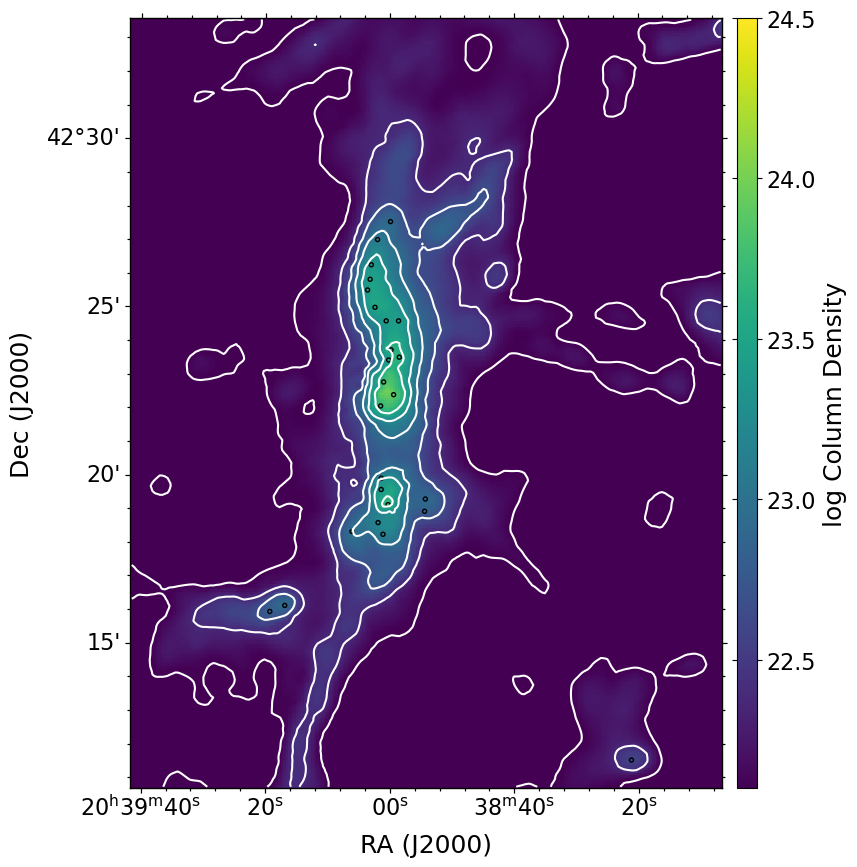

In [5]:
filename2= '../FITS_file/new_fits/DR21_full_log_NH2_Repr.fits'

Herschel = fits.open(filename2)
MapHer250 = Herschel[0]

title = 'SIMPLIFI'

# figure
width  = 50
height = 50
cmap = 'plasma'

title_size = 16
tick_labels = 15
label_plot = 15
label_colorbar = 15
tick_colorbar = 15
label_fontsize = 20

SNRi_cut = 100
scalevec = 0.5 #1px = scalevec * 1% pol 
vec_legend = 5.0



#### SCRIPT
fig = plt.figure(figsize=(13,10))
gc = FITSFigure(MapHer250,figure=fig)
gc.show_colorscale(cmap='default',vmin = 22.1,vmax = 24.5)
gc.add_colorbar(location='right', width=0.2, pad=0.15, ticks=None,axis_label_text= 'log Column Density')
gc.show_contour(colors = 'white',levels = 7)
gc.show_circles(RA_array,DEC_array,0.001)
plt.show()


INFO: Auto-setting vmin to -5.491e+00 [aplpy.core]
INFO: Auto-setting vmax to  7.775e+01 [aplpy.core]


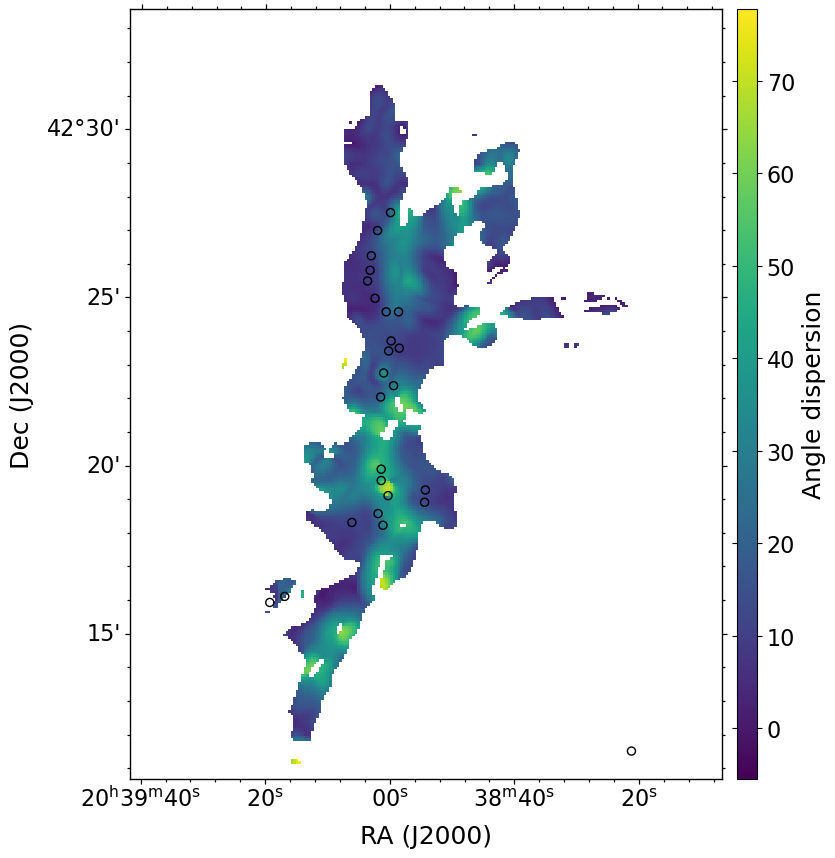

In [6]:
filename2= '../Internship-MIT/S_map.fits'

Herschel = fits.open(filename2)
MapHer250 = Herschel[1]

title = 'SIMPLIFI'

# figure
width  = 50
height = 50
cmap = 'plasma'

title_size = 16
tick_labels = 15
label_plot = 15
label_colorbar = 15
tick_colorbar = 15
label_fontsize = 20

SNRi_cut = 100
scalevec = 0.5 #1px = scalevec * 1% pol 
vec_legend = 5.0



#### SCRIPT
fig = plt.figure(figsize=(13,10))
gc = FITSFigure(MapHer250,figure=fig)
gc.show_colorscale(cmap='default')
gc.add_colorbar(location='right', width=0.2, pad=0.15, ticks=None,axis_label_text= 'Angle dispersion')
# gc.show_contour(colors = 'white',levels = 4)
gc.show_circles(RA_array,DEC_array,0.002)
plt.show()

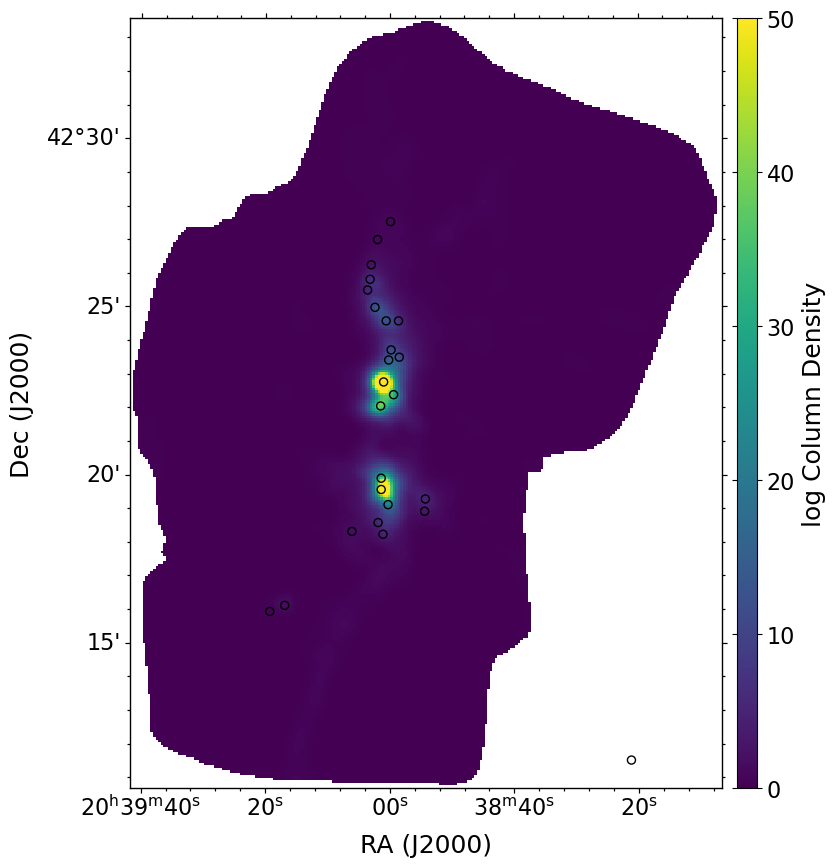

In [20]:
filename2= '../FITS_file/new_fits/DR21_OTF_full_pipeline.fits'

Herschel = fits.open(filename2)
MapHer250 = Herschel[0]

title = 'SIMPLIFI'

# figure
width  = 50
height = 50
cmap = 'plasma'

title_size = 16
tick_labels = 15
label_plot = 15
label_colorbar = 15
tick_colorbar = 15
label_fontsize = 20

SNRi_cut = 100
scalevec = 0.5 #1px = scalevec * 1% pol 
vec_legend = 5.0



#### SCRIPT
fig = plt.figure(figsize=(13,10))
gc = FITSFigure(MapHer250,figure=fig)
gc.show_colorscale(cmap='default',vmin =0,vmax = 50)
gc.add_colorbar(location='right', width=0.2, pad=0.15, ticks=None,axis_label_text= 'log Column Density')
# gc.show_contour(colors = 'white',levels = 4)
gc.show_circles(RA_array,DEC_array,0.002)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12144\550504700.py:86: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gc.add_scalebar(vec_legend*vecscale,r'$p_{frac}$ ='+np.str(vec_legend),corner='bottom right',frame=True,color='black')


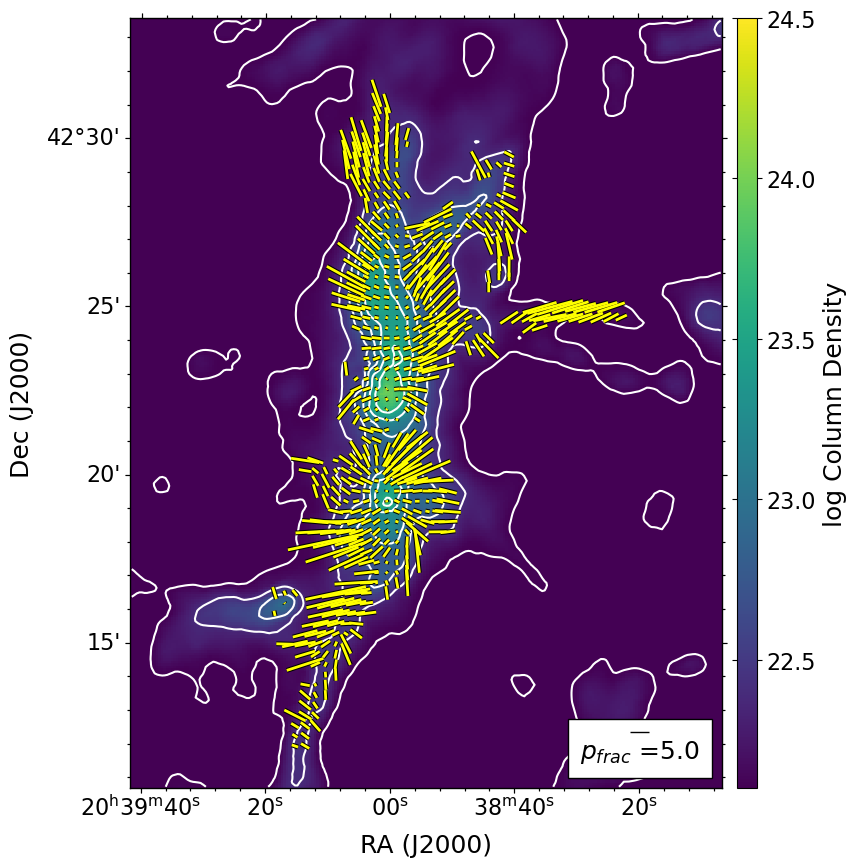

In [ ]:
def get_data(infile):
	#get data
	hawc = fits.open(infile)
	p    = hawc[8]
	perr = hawc[9]
	#pa   = hawc['ROTATED POL ANGLE']
	pa   = hawc[11]
	stkI = hawc[0]
	stkIerr = hawc[1]
	pi   = hawc[15]
	pierr   = hawc[14]

	#Jy/px to Jy/sqarcsec
	pxscale = stkI.header['CDELT2']*3600
	stkI.data /= pxscale**2
	pi.data /= pxscale**2 
	stkIerr.data /= pxscale**2
	return p,perr,pa,stkI,stkIerr,pi,pierr,pxscale

def quality_cuts(stkI,stkIerr,p,perr,SNRp_cut,p_cut,SNRi_cut):
	#snr in P
	SNRp = p.data/perr.data
	mask_snrp = np.where(SNRp < SNRp_cut)
	p.data[mask_snrp] = np.nan
	#p_cut
	maskp = np.where(p.data > p_cut)
	p.data[maskp] = np.nan
	#snr in P
	SNRi = stkI.data/stkIerr.data
	mask_snri = np.where(SNRi < SNRi_cut)
	p.data[mask_snri] = np.nan
	return p


filename1='../FITS_file/new_fits/DR21_OTF_full_pipeline.fits'
filename2= '../FITS_file/new_fits/DR21_full_log_NH2_Repr.fits'

hawcp = fits.open(filename1)
Herschel = fits.open(filename2)
MapHer250 = Herschel[0]

x = hawcp['STOKES I'].data
y = hawcp['DEBIASED PERCENT POL'].data
y1=hawcp['ROTATED POL ANGLE'].data
y2 = hawcp['DEBIASED POL FLUX'].data



Herschel = fits.open(filename2)
MapHer250 = Herschel[0]

title = 'SIMPLIFI'

SNRp_cut = 3.0
p_cut = 50
width  = 50
height = 50
cmap = 'plasma'
title_size = 16
tick_labels = 15
label_plot = 15
label_colorbar = 15
tick_colorbar = 15
label_fontsize = 20
SNRi_cut = 100
scalevec = 1.5 #1px = scalevec * 1% pol 
vec_legend = 5.0


p,perr,pa,stkI,stkIerr,pi,pierr,pxscale = get_data(filename1)
p = quality_cuts(stkI,stkIerr,p,perr,SNRp_cut,p_cut,SNRi_cut)

RA = (stkI.header['OBSRA']*u.hourangle).to(u.deg)
DEC = stkI.header['OBSDEC']*u.deg


#### SCRIPT
fig = plt.figure(figsize=(13,10))
gc = FITSFigure(MapHer250,figure=fig)
gc.show_colorscale(cmap='default',vmin = 22.1,vmax = 24.5)
gc.add_colorbar(location='right', width=0.2, pad=0.15, ticks=None,axis_label_text= 'log Column Density')
gc.show_contour(colors = 'white',levels = 7)
gc.show_vectors(p,pa,scale=scalevec,step=4,color='black',linewidth=3.5)
gc.show_vectors(p,pa,scale=scalevec,step=4,color='yellow',linewidth=2.0)
vecscale = scalevec * pxscale/3600
gc.add_scalebar(vec_legend*vecscale,r'$p_{frac}$ ='+np.str(vec_legend),corner='bottom right',frame=True,color='black')
plt.show()
